
# Final Project
## Introduction
- This notebok is created for Final Project - Big Data Analysis.
- In this project, we will cover "diabetes.cvs" dataset.

## Objective
- To build classification models that predict the future probabilities of a person to become diabetic or not based
on other factors (independent variables)
- To find he models’ prediction 
- In this project, we will apply supervised learning - logistic Regression.
- Model Building includes 2 classification models:
1. AdaBoost Classifier
2. Gradient Boosting Classifier

## Data Description
Data Description:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration (2 hours in an oral glucose tolerance test)
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1). This is a target variable.

In [0]:
!pip install --upgrade pip

In [0]:
!pip install -q findspark

In [0]:
!pip install pyspark

# Cretae SparkSession

In [0]:
import findspark
findspark.init()
#Starting a Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('financial').getOrCreate()

In [0]:
!pip install xgboost 

# Import Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

## Loading Dataset

In [0]:
#Reading dataset
diabetes_sdf = spark.read.csv("/FileStore/tables/diabetes-1.csv", header = 'true', inferSchema = 'true')

In [0]:
diabetesData = diabetes_sdf.toPandas()

## EDA

In [0]:
diabetesData.shape

Out[72]: (768, 9)

In [0]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


In [0]:
diabetesData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
diabetesData['Outcome'].value_counts

Out[75]: <bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int32>

In [0]:
type(diabetesData)

Out[76]: pandas.core.frame.DataFrame

In [0]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


In [0]:
#there is no missing 
diabetesData.isnull().sum()

Out[78]: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
diabetesData.tail

Out[79]: <bound method NDFrame.tail of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.

In [0]:
diabetesData.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
#number of data dimensionality
diabetesData.ndim

Out[81]: 2

In [0]:
diabetesData.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
diabetesData.size

Out[83]: 6912

## EDA Summary
- dataset has (768, 9) dimension - sizes
- this dataset size is 6912
- it has int and float datatype
- there is no missing value
- dependent value = Outcome, Length: 768, dtype: int32>

## Data Pre-processing

In [0]:
#there is no missing 
diabetesData.isnull().sum()

Out[84]: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observation
there is no missig value in this dataset and all variables are int and float

## Model Building

### Defining x and y 

In [0]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


In [0]:
X = diabetesData.drop("Outcome", axis=1)
X = pd.get_dummies(X, drop_first=True)
y = diabetesData.pop("Outcome")

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 30.1 KB


In [0]:
X.shape

Out[93]: (768, 8)

## Split Data


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)


In [0]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X
 
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Building the models:
 AdaBoost Classifier and Gradient Boosting Classifier

### AdaBoost Classifier

In [0]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
Out[66]: AdaBoostClassifier(random_state=1)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8435754189944135
Accuracy on test set :  0.7575757575757576
Recall on training set :  0.7540106951871658
Recall on test set :  0.5925925925925926
Precision on training set :  0.7877094972067039
Precision on test set :  0.676056338028169


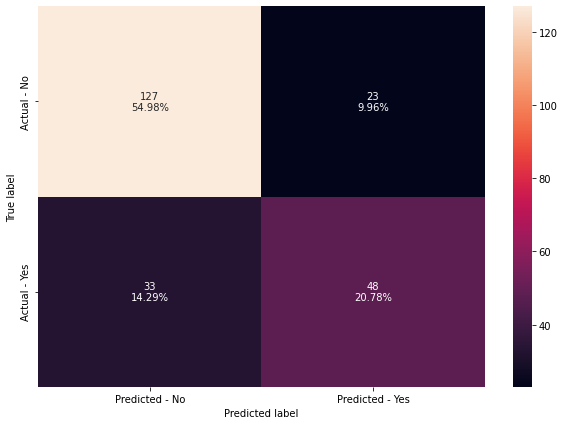

In [0]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier


In [0]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

Out[101]: GradientBoostingClassifier(random_state=1)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9385474860335196
Accuracy on test set :  0.7229437229437229
Recall on training set :  0.8823529411764706
Recall on test set :  0.49382716049382713
Precision on training set :  0.9375
Precision on test set :  0.6349206349206349


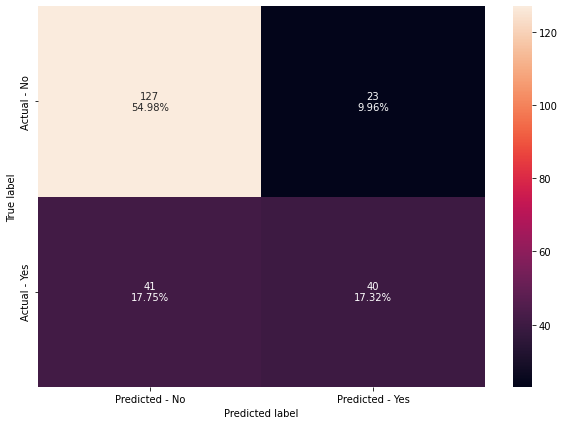

In [0]:
make_confusion_matrix(gbc,y_test)

### Evaluation Models
- Accuracy: The Adaboost Classifier has higher accuracy on both the training and test sets compared to the Gradient Boosting Classifier.
- Precision: The Adaboost Classifier has higher precision on both the training and test sets compared to the Gradient Boosting Classifier. This indicates that the Adaboost Classifier makes fewer false positive predictions.
- Recall: The Adaboost Classifier has higher recall on both the training and test sets compared to the Gradient Boosting Classifier. This indicates that the Adaboost Classifier captures a higher proportion of positive instances.
- Based on these observations, if our goal is to minimize false positives (maximize precision) while capturing as many positive instances as possible (maximize recall), we should prioritize maximizing precision and recall. In this case, the Adaboost Classifier has perform better as it achieves higher precision and recall on both the training and test sets compared to the Gradient Boosting Classifier.

## Hyperparameter Tuning
### AdaBoost Classifier

In [0]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)
 
# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
 
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
 
# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
 
# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_
 
# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Out[104]: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1.9000000000000001, n_estimators=10,
                   random_state=1)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7057728119180633
Accuracy on test set :  0.6753246753246753
Recall on training set :  0.839572192513369
Recall on test set :  0.7901234567901234
Precision on training set :  0.5508771929824562
Precision on test set :  0.5245901639344263


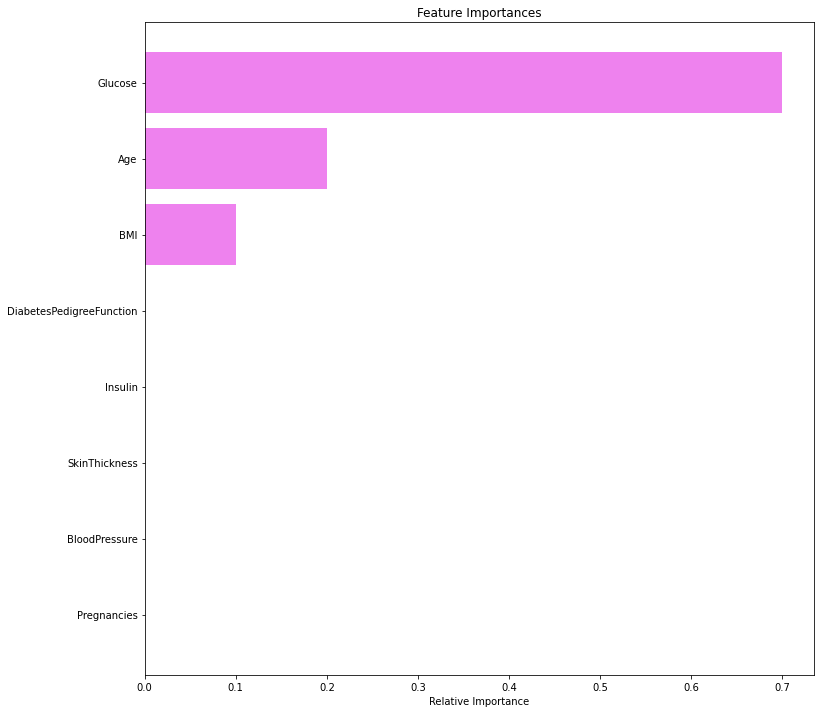

In [0]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

In [0]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

Out[108]: GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [0]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
 
# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
 
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
 
# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
 
# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_
 
# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Out[110]: GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=150, random_state=1,
                           subsample=1)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9683426443202979
Accuracy on test set :  0.7272727272727273
Recall on training set :  0.93048128342246
Recall on test set :  0.5061728395061729
Precision on training set :  0.9775280898876404
Precision on test set :  0.640625


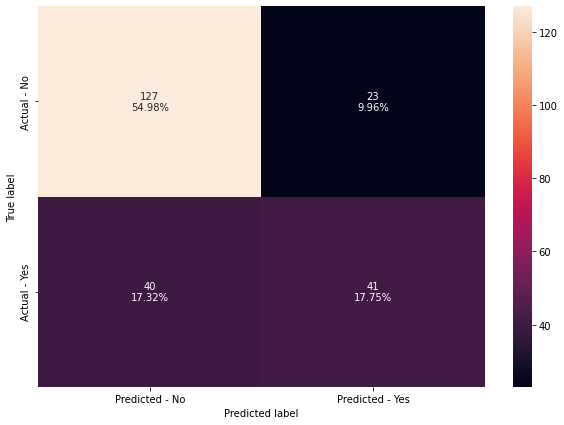

In [0]:
make_confusion_matrix(gbc_tuned,y_test)

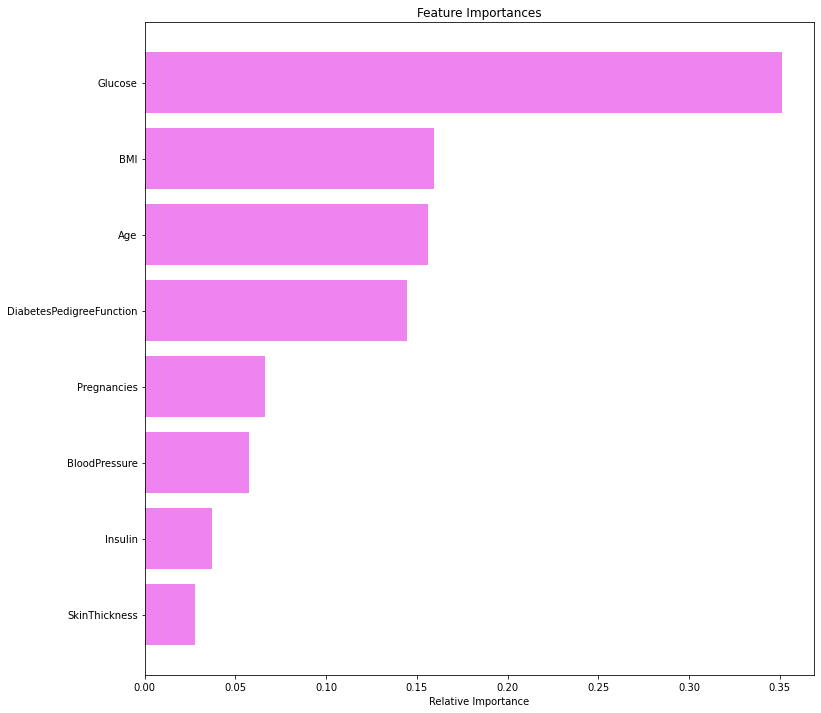

In [0]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all models

In [0]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned]
 
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
 
# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [0]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.84,0.76,0.75,0.59,0.79,0.68
1,AdaBoost Tuned,0.71,0.68,0.84,0.79,0.55,0.52
2,Gradient Boosting with default parameters,0.94,0.72,0.88,0.49,0.94,0.63
3,Gradient Boosting with init=AdaBoost,0.94,0.76,0.88,0.57,0.94,0.69
4,Gradient Boosting Tuned,0.97,0.73,0.93,0.51,0.98,0.64


### Observations
Based on these results:
- AdaBoost with default parameters performs reasonably well with high precision but lower recall on the test set.
- AdaBoost tuned has lower accuracy and precision compared to the default AdaBoost, but it has higher recall.
- Gradient Boosting models generally perform well on the training set, but they tend to overfit, as evidenced by the drop in performance on the test set. However, the model initialized with AdaBoost seems to perform better.
- Gradient Boosting tuned has the highest accuracy and precision on the training set but does not generalize well to the test set, indicating potential overfitting.

## Conclusion
- install packages
- Upload PySpark and Spark libs
- create a spark session
- loading libraries
- read/load dataset using spark and pyspark
- EDA : see information, head, summary, missing value, describing statistical summary of table, data type
- Model Buildig: defining x and y, spliting data and model building (AdaBoost Classifier and Gradient Boosting Classifier)
1. Adaboost Classifier : 
  -- Accuracy on training set :  0.8435754189944135
  -- Accuracy on test set :  0.7575757575757576
  -- Recall on training set :  0.7540106951871658
  -- Recall on test set :  0.5925925925925926
  -- Precision on training set :  0.7877094972067039
  -- Precision on test set :  0.676056338028169
2. Gradient Boosting Classifier
  -- Accuracy on training set :  0.9385474860335196
  -- Accuracy on test set :  0.7229437229437229
  -- Recall on training set :  0.8823529411764706
  -- Recall on test set :  0.49382716049382713
  -- Precision on training set :  0.9375
  -- Precision on test set :  0.6349206349206349
- Based on these calculations, the Gradient Boosting model with tuning (GB Tuned) seems to have the highest, suggesting better overall performance among the models.
- AdaBoost with default parameters performs reasonably well with high precision but lower recall on the test set.
- AdaBoost tuned has lower accuracy and precision compared to the default AdaBoost, but it has higher recall.
- Gradient Boosting models generally perform well on the training set, but they tend to overfit, as evidenced by the drop in performance on the test set. However, the model initialized with AdaBoost seems to perform better.
- Gradient Boosting tuned has the highest accuracy and precision on the training set but does not generalize well to the test set, indicating potential overfitting.